In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

# Bellabeat Case Study- Google Data Analytics Capstone


# Background
Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. The company has 5 focus products: bellabeat app, leaf, time, spring and bellabeat membership. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Our team have been asked to analyze smart device data to gain insight into how consumers are using their smart devices. The insights we discover will then help guide marketing strategy for the company.

# ASK
As the data analyst, we are being asked to analyze the available data to learn how members are using this technology in order to help propel Bellabeat as a global player.

# ABOUT OUR DATA
There are 18 different csv files in our dataset following 30 different users. For my analysis, I looked at the dailyActivty_merged csv which combined data from multiple different files into one. This csv has 33 distinct users and columns labeled 
* Id
* ActivtyDate
* TotalSteps
* TotalDistance
* TrackerDistance
* LoggedActivtiesDistance
* VeryActiveMinutes & VeryActiveDistance
* ModeratelyActiveMinutes & ModeratelyActiveDistance
* LightActiveMinutes & LightActiveDistance
* SedentaryMinutes & SedentaryActiveDistance
* Calories

Additionally, I looked at the weightLogInfo csv which tracked weight-related data for 8 different users. The columns were labeled as follows
* Id
* Date
* WeightKg
* WeightPounds
* Fat
* BMI
* IsManualReport
* LogId

# PREPARING OUR DATA

We first want to explore the datasets we have provided and get to know our data. We want to see the quantities stored in each csv, the amount of entries, etc. 

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

#SETTING A STYLE FOR PLOTS
plt.style.use("ggplot")

In [3]:
#reading in dailyActivity file and weightLogInfo
#these two files have the data that I want to further analyze already merged 
da = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
wL = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')


In [4]:
#checking data types contained in our dataframes
print(da.dtypes)
print(' ')
print(wL.dtypes)

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
 
Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object


In [5]:
#In dailyActivty df I want to convert 'Id' to a string variable 
# && convert ActivtyDate to datetime format

#converting ID to string
da['Id'] = da['Id'].astype(str) 
#convert ActivityDate to datetime
da['ActivityDate'] = pd.to_datetime(da['ActivityDate'],format='%m/%d/%Y') 
da.dtypes #checking our data types


Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [6]:
#show weightLog
display(wL)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [7]:
#check how many user Id's are stored in df
wL['Id'].unique()

array([1503960366, 1927972279, 2873212765, 4319703577, 4558609924,
       5577150313, 6962181067, 8877689391])

In [8]:
#shape of file
wL.shape

(67, 8)

# ClEANING OUR DATA


Now that we have become familiarized with our datasets we now want to clean it and get it prepped for further analysis. I want to check for null values, change datatypes into more usable formats, calculate new columns, and merge datasets together based off common quantities. 

In [9]:
#In WeightLog df I want to convert 'Id' to a string
#&& 'Date' to datetime

wL['Id'] = wL['Id'].astype(str)
wL['Date'] = pd.to_datetime(wL['Date'], format= 'mixed') #converting weightLog to dateTime dtype
wL.dtypes #checking our weightLog dtypes

Id                        object
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object

In [10]:
#print first five rows of our da dataframe
da.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [11]:
#check for duplicate values - da
da[da.duplicated()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [12]:
#check for duplicate values - wL
wL[wL.duplicated()]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId


In [13]:
#checking for null values
print(da.isna().sum())
print(' ')
print(wL.isna().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
 
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64


In [14]:
#further exploring NA values in wL
display(wL)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [15]:
#removing 'Fat' column from wL
wL.drop('Fat', axis= 1)

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000
...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,25.440001,False,1462517015000
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,25.559999,False,1462692953000
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,25.610001,False,1462775984000
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,25.559999,False,1462949507000


In [16]:
#dailyActivity dataframe adding columns 
#totalActiveMinutes = LightlyActiveMinutes+FairlyActiveMinutes+VeryActiveMinutes
da['TotalActiveMinutes'] = da['LightlyActiveMinutes']+da['FairlyActiveMinutes']+da['VeryActiveMinutes']

In [17]:
#Adding day of week to dailyActivity for analysis purposes
da['DayOfWeek'] = da['ActivityDate'].dt.day_name()
da['NumDayOfWeek'] = da['ActivityDate'].dt.weekday #0 = Monday, 6 = Sunday

In [18]:
da.head() #checking dataframe again

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,DayOfWeek,NumDayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,Friday,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,Saturday,5


In [19]:
#create new dataframe with columns that won't be used for analysis
da2 = da.drop(['TrackerDistance','LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance',
             'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 
              "FairlyActiveMinutes", 'LightlyActiveMinutes'], axis = 1 )

In [20]:
#check new dataframe
da2.head()

,Id,ActivityDate,TotalSteps,TotalDistance,SedentaryMinutes,Calories,TotalActiveMinutes,DayOfWeek,NumDayOfWeek
0,1503960366,2016-04-12,13162,8.50,728,1985,366,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,776,1797,257,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,1218,1776,222,Thursday,3
3,1503960366,2016-04-15,9762,6.28,726,1745,272,Friday,4
4,1503960366,2016-04-16,12669,8.16,773,1863,267,Saturday,5


In [21]:
#combining the two files 
res = pd.concat([da2, wL])

In [22]:
#checking new dataframe
res.head()

,Id,ActivityDate,TotalSteps,TotalDistance,SedentaryMinutes,Calories,TotalActiveMinutes,DayOfWeek,NumDayOfWeek,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162.0,8.50,728.0,1985.0,366.0,Tuesday,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735.0,6.97,776.0,1797.0,257.0,Wednesday,2.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460.0,6.74,1218.0,1776.0,222.0,Thursday,3.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762.0,6.28,726.0,1745.0,272.0,Friday,4.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669.0,8.16,773.0,1863.0,267.0,Saturday,5.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#checking shape of new dataframe
print(da2.shape, ' ', wL.shape)
res.shape

(940, 9)   (67, 8)


(1007, 16)

In [24]:
#I want each userID to pair with the averages of all their data
#(Steps/Distance/Calories/ActivityMins/Weight/BMI)

#groups by 'Id' column
res_grp = res.groupby(['Id'])

#calculating averages based off individual ID
WeightPoundAvg = res_grp['WeightPounds'].mean().sort_values()
TotalMin_avg = res_grp['TotalActiveMinutes'].mean().sort_values()
BMIAvg = res_grp['BMI'].mean().sort_values()
CaloriesAvg = res_grp['Calories'].mean().sort_values()
TotalStepsAvg = res_grp['TotalSteps'].mean().sort_values()
TotalDistanceAvg = res_grp['TotalDistance'].mean().sort_values()

In [25]:
#Adding all of these averages to 1 dataframe
result = WeightPoundAvg.to_frame()
result['BMIAvg'] = BMIAvg
result['TotalMinAvg'] = TotalMin_avg
result['CaloriesAvg'] = CaloriesAvg
result['TotalStepsAvg']= TotalStepsAvg
result['TotalDistanceAvg']=TotalDistanceAvg
display(result)

,WeightPounds,BMIAvg,TotalMinAvg,CaloriesAvg,TotalStepsAvg,TotalDistanceAvg
Id,,,,,,
1503960366,115.963147,22.650000,277.806452,1816.419355,12116.741935,7.809677
2873212765,125.663489,21.570001,328.225806,1916.967742,7555.774194,5.101613
6962181067,135.701872,24.028000,287.129032,1982.032258,9794.806452,6.585806
4558609924,153.529918,27.214000,309.064516,2033.258065,7685.129032,5.080645
4319703577,159.504452,27.415000,244.677419,2037.677419,7268.838710,4.892258
8877689391,187.714432,25.487083,310.709677,3420.258065,16040.032258,13.212903
5577150313,199.959265,28.000000,265.100000,3359.633333,8304.433333,6.213333
1927972279,294.317120,47.540001,40.677419,2172.806452,916.129032,0.634516
1624580081,NaN,NaN,167.967742,1483.354839,5743.903226,3.914839


In [26]:
#creating a column for BMI index
#BMI < 18.5 == underweight, 18.5 <= BMI <= 24.9 == average, 
#25<= BMI <= 29.9 == overweight, 30<= BMI == obese

conditions = [(BMIAvg <18.5), (BMIAvg >= 18.5) & (BMIAvg <= 24.9),
            (BMIAvg>= 25) & (BMIAvg <= 29.9),
            (BMIAvg>= 30)]
values = ['underweight', 'average', 'overweight', 'obese']

result['BMIClass'] = np.select(conditions, values)
BMIRange = result['BMIClass']
display(result)

,WeightPounds,BMIAvg,TotalMinAvg,CaloriesAvg,TotalStepsAvg,TotalDistanceAvg,BMIClass
Id,,,,,,,
1503960366,115.963147,22.650000,277.806452,1816.419355,12116.741935,7.809677,average
2873212765,125.663489,21.570001,328.225806,1916.967742,7555.774194,5.101613,average
6962181067,135.701872,24.028000,287.129032,1982.032258,9794.806452,6.585806,average
4558609924,153.529918,27.214000,309.064516,2033.258065,7685.129032,5.080645,overweight
4319703577,159.504452,27.415000,244.677419,2037.677419,7268.838710,4.892258,overweight
8877689391,187.714432,25.487083,310.709677,3420.258065,16040.032258,13.212903,overweight
5577150313,199.959265,28.000000,265.100000,3359.633333,8304.433333,6.213333,overweight
1927972279,294.317120,47.540001,40.677419,2172.806452,916.129032,0.634516,obese
1624580081,NaN,NaN,167.967742,1483.354839,5743.903226,3.914839,0


In [27]:
#saving files to further explore in Tablaeu
da2.to_csv("DailyActivity.csv", index = False)
wL.to_csv("WeightLog.csv", index = False)
result.to_csv("MergedUser.csv", index = False)

# PYTHON ANALYSIS

Below is the same analysis and graphs produced in tableau, however I wanted to further explore 
the Pandas, Matplotlib, and Seaborn libraries

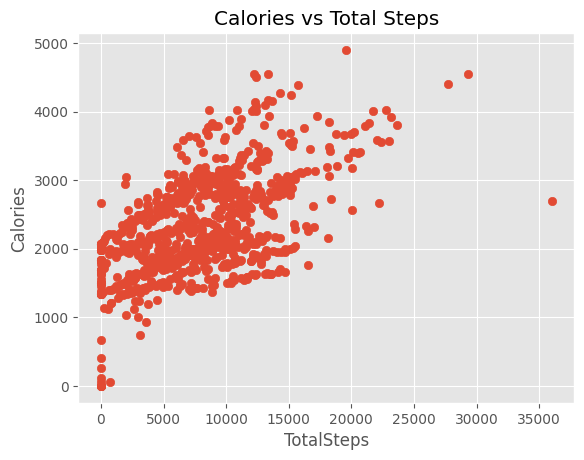

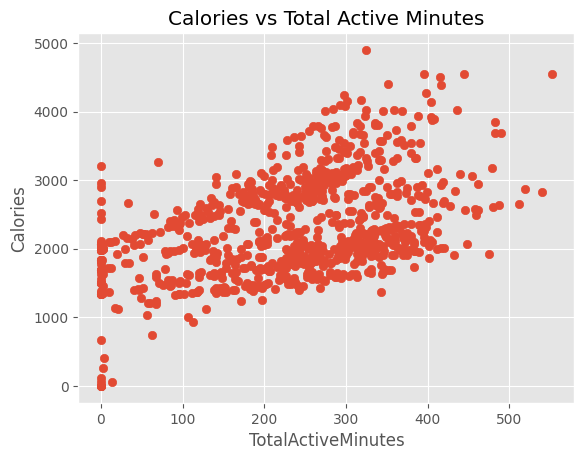

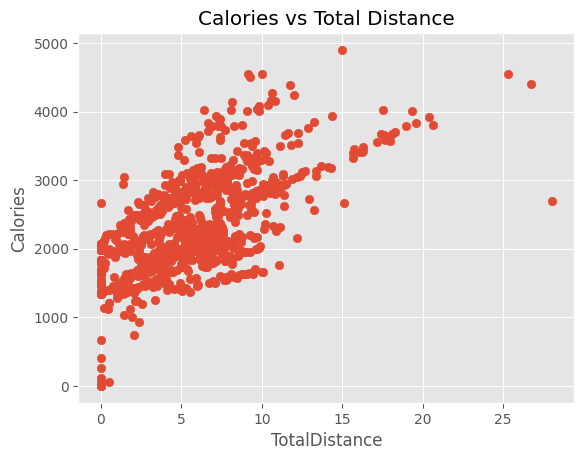

In [28]:
#CALORIES VS TOTALSTEPS GRAPH
#CALORIES VS TOTALACTIVEMINUTES
#CALORIES VS TOTALDISTANCE
plt.scatter(da2['TotalSteps'], da2['Calories'])
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.title('Calories vs Total Steps')
plt.show()
plt.close()

plt.scatter(da2['TotalActiveMinutes'], da2['Calories'])
plt.xlabel('TotalActiveMinutes')
plt.ylabel('Calories')
plt.title('Calories vs Total Active Minutes')
plt.show()
plt.close()

plt.scatter(da2['TotalDistance'], da2['Calories'])
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.title('Calories vs Total Distance')
plt.show()
plt.close()



Graph Observations: 
* The first three charts produced are a scatterplot comparing the total steps, distance, and time active against the amount of calories burned. All three charts show a positive relationship between the two quantities. It can be observed that as the x value increases, so does the y. 

In [29]:
#checking result DF
result.head()

,WeightPounds,BMIAvg,TotalMinAvg,CaloriesAvg,TotalStepsAvg,TotalDistanceAvg,BMIClass
Id,,,,,,,
1503960366,115.963147,22.650000,277.806452,1816.419355,12116.741935,7.809677,average
2873212765,125.663489,21.570001,328.225806,1916.967742,7555.774194,5.101613,average
6962181067,135.701872,24.028000,287.129032,1982.032258,9794.806452,6.585806,average
4558609924,153.529918,27.214000,309.064516,2033.258065,7685.129032,5.080645,overweight
4319703577,159.504452,27.415000,244.677419,2037.677419,7268.838710,4.892258,overweight


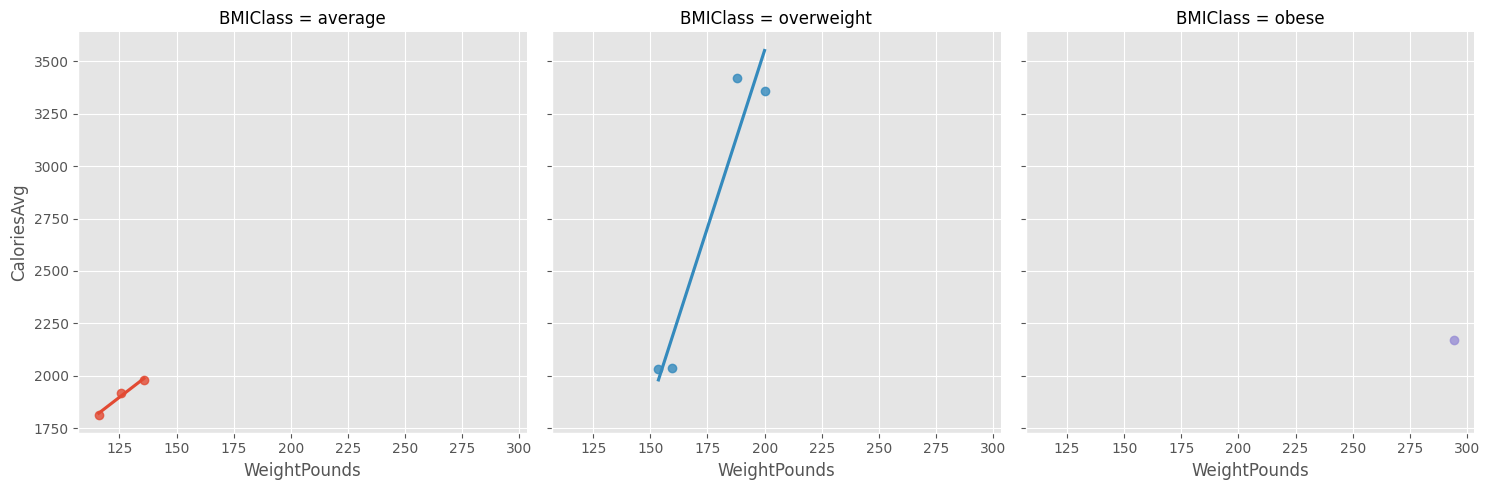

In [30]:
#dropping any NULL values in new DF
rCopy = result.dropna()

#plots comparing weight in pounds to the average amount of calories burned
#the graphs are broken up between BMI classifications

snb.lmplot(data = rCopy, x = "WeightPounds", y = "CaloriesAvg", 
           hue = "BMIClass", col = "BMIClass", ci = None)
plt.show()
plt.close()

Although there is a very small sample of data, it can be observed that users in a higher BMI class are burning more calories per day. 

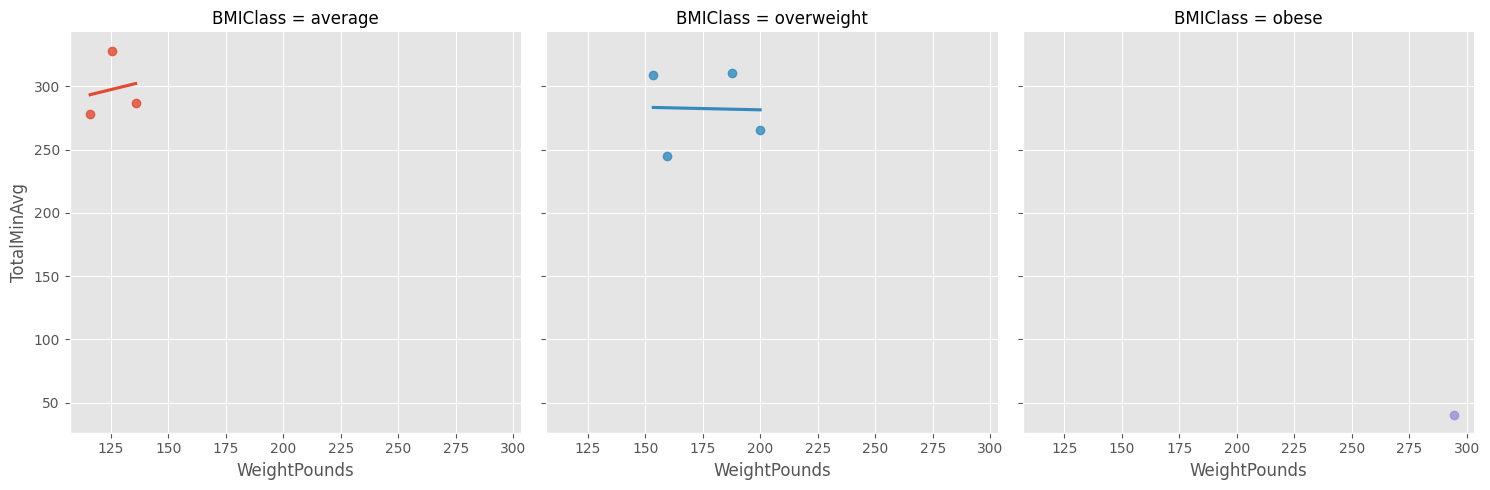

In [31]:
#plots comparing weight in pounds to the average amount of time an indv is active
#the graphs are broken up between BMI classifications once again
snb.lmplot(data = rCopy, x = "WeightPounds", y = "TotalMinAvg", hue = "BMIClass",
          col = "BMIClass", ci = None)

The above graphs once again are from a small sample of data comparing a user's weight with the average time they spend active. Most users spend relatively the same tim active each day, despite their BMI. The user classified with an obsese BMI is shown to be active the least amount of time. More data from this classification however would be needed to come up with an accurate prediction. 

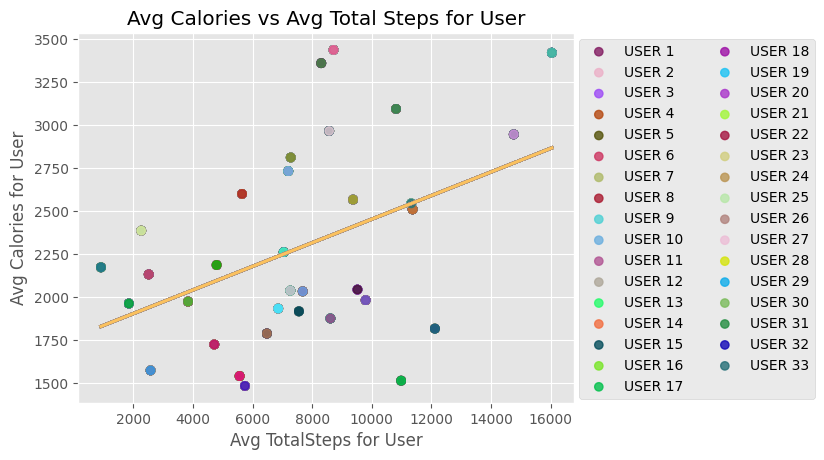

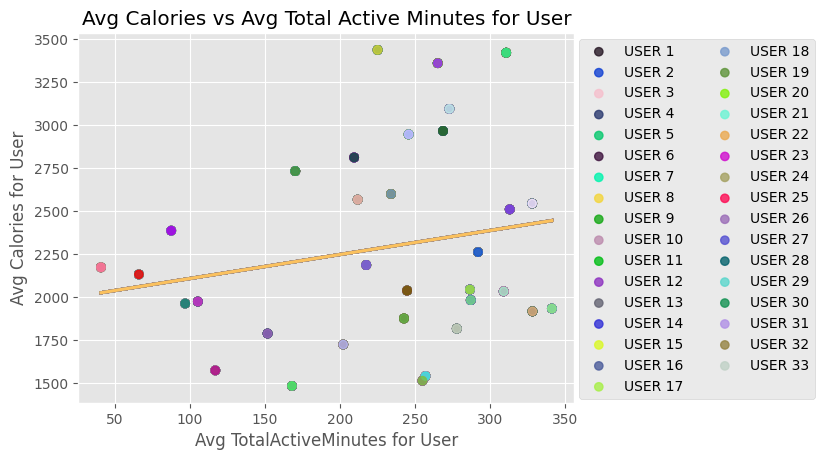

In [32]:
#plots comparing avg calories burned per user vs avg total steps and time active per user
for i in range (len(result['TotalStepsAvg'])):
    snb.regplot(data = result, x = "TotalStepsAvg", y = "CaloriesAvg",
        scatter_kws = {"color": np.random.rand(len(result['TotalStepsAvg']), 3)},
        #line_kws = {"color": "red"},
        label = f"USER {i+1}", ci = None)
    
plt.xlabel('Avg TotalSteps for User')
plt.ylabel('Avg Calories for User')
plt.legend(loc = (1.01,0.01), ncol = 2)
plt.title('Avg Calories vs Avg Total Steps for User')
plt.legend(loc = (1.01,0.01), ncol = 2)
plt.show()
plt.close()

for i in range (len(result['TotalMinAvg'])):
    snb.regplot(data = result, x = "TotalMinAvg", y = "CaloriesAvg",
        scatter_kws = {"color": np.random.rand(len(result['TotalMinAvg']), 3)},
        #line_kws = {"color": "red"},
        label = f"USER {i+1}", ci = None)
    
plt.xlabel('Avg TotalActiveMinutes for User')
plt.ylabel('Avg Calories for User')
plt.legend(loc = (1.01,0.01), ncol = 2)
plt.title('Avg Calories vs Avg Total Active Minutes for User')
plt.legend(loc = (1.01,0.01), ncol = 2)
plt.show()
plt.close()

In [33]:
#importing library for table formatting
from tabulate import tabulate
#creating a chart of users avg weight and avg BMI
wL_grp = wL.groupby(['Id'], sort = False)
WeightPoundAvg = wL_grp['WeightPounds'].mean().sort_values()
BMIAvg = wL_grp['BMI'].mean().sort_values()
WeightAvg = WeightPoundAvg.to_frame()
WeightAvg['BMIAvg'] = BMIAvg
WeightAvg = WeightAvg.rename(columns ={'WeightPounds': 'WeightPoundAvg'})
print(tabulate(WeightAvg, headers = 'keys', tablefmt = 'psql'))

+------------+------------------+----------+
|         Id |   WeightPoundAvg |   BMIAvg |
|------------+------------------+----------|
| 1503960366 |          115.963 |  22.65   |
| 2873212765 |          125.663 |  21.57   |
| 6962181067 |          135.702 |  24.028  |
| 4558609924 |          153.53  |  27.214  |
| 4319703577 |          159.504 |  27.415  |
| 8877689391 |          187.714 |  25.4871 |
| 5577150313 |          199.959 |  28      |
| 1927972279 |          294.317 |  47.54   |
+------------+------------------+----------+


In [34]:
#Analysis to see how different quantities vary per day
DayGrp = da2.groupby(['DayOfWeek'])

CalByDay = DayGrp['Calories'].mean().sort_values()
CalByDay = CalByDay.to_frame()
CalByDay

StepsByDay = DayGrp['TotalSteps'].mean().sort_values()
CalByDay['Steps'] = StepsByDay
#print(StepsByDay)

ActiveMins = ((DayGrp['TotalActiveMinutes'].mean().sort_values())/1440)*100
CalByDay['ActiveMin'] = ActiveMins
# print(ActiveMins)

CalByDay.to_csv("DayGrp.csv", index = False)

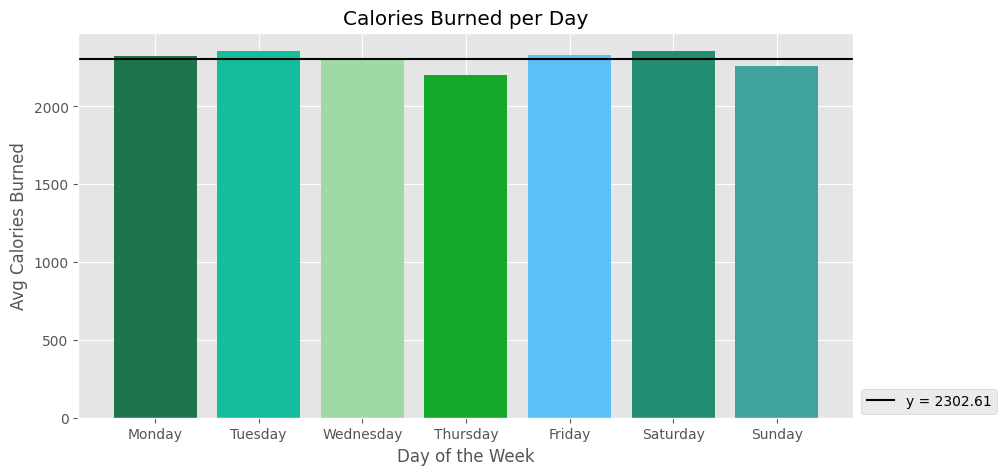

In [35]:
Day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Cal = [2324.208333,2356.013158,2302.620000,2199.571429,2331.785714,2354.967742,2263.000000]
Steps = [7780.866667,8125.006579,7559.373333,7405.836735,7448.230159,8152.975806, 6933.231405]
MinutesActivePerc = [ 15.914352,16.293860,15.537037, 15.054800, 16.414242,16.962926,14.478306]

plt.figure(figsize= (10,5))
plt.bar(Day, Cal, color=np.random.rand(len(Day), 3))
plt.axhline(y=2303.609574, c= 'black', label = "y = 2302.61")
plt.legend(loc = (1.01,0.01))
plt.xlabel('Day of the Week')
plt.ylabel('Avg Calories Burned')
plt.title('Calories Burned per Day')
plt.show()
plt.close()

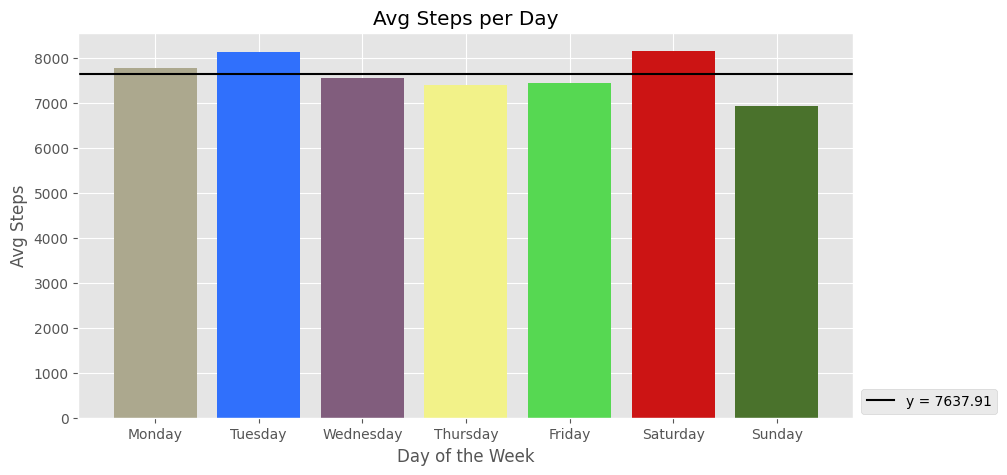

In [36]:
plt.figure(figsize= (10,5))
plt.bar(Day, Steps, color = np.random.rand(len(Day), 3))
plt.axhline(y=7637.910638, c= 'black', label = "y = 7637.91")
plt.legend(loc = (1.01,0.01))
plt.xlabel('Day of the Week')
plt.ylabel('Avg Steps')
plt.title('Avg Steps per Day')
plt.show()
plt.close()

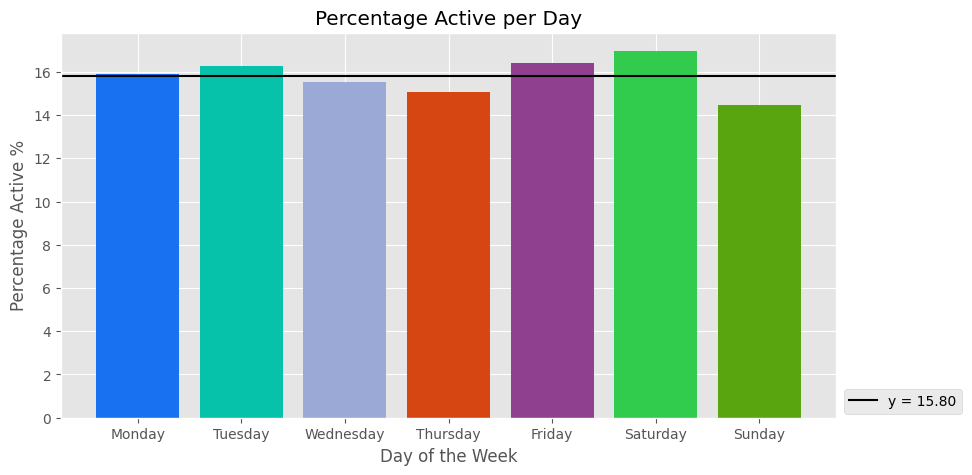

In [37]:
plt.figure(figsize= (10,5))
plt.bar(Day, MinutesActivePerc, color = np.random.rand(len(Day), 3))
plt.axhline(y=(227.542553/1440)*100, c= 'black', label = f'y = 15.80')
plt.legend(loc = (1.01,0.01))
plt.xlabel('Day of the Week')
plt.ylabel('Percentage Active %')
plt.title('Percentage Active per Day')
plt.show()
plt.close()

# SUMMARY

In [38]:

# # plt.subplot(2,2,1)
# color = ['green', 'cyan', 'purple', 'pink', 'orange', 'red', 'yellow', 'maroon']

# for i in range (8):
#     snb.regplot(data = result, x = "WeightPounds", y = "CaloriesAvg",
#         scatter_kws = {"color": color}, ci = None)
#         #line_kws = {"color": "red"},
#         #label = f"USER {i+1}", ci = None)
# plt.legend(loc=(1.01, 0.01), ncol=2)
    
# plt.show()
# plt.close()
# # plt.subplot(2,2,2)
# for i in range (8):
#     snb.regplot(data = result, x = "WeightPounds", y = "TotalStepsAvg",
#         scatter_kws = {"color": color})
#         #line_kws = {"color": "red"},
#         #label = f"USER {i+1}", ci = None)
# plt.legend(loc=(1.1, 0.1), ncol=2)
    
# plt.show()
# plt.close()
# # plt.subplot(2,2,3)
# for i in range (8):
#     snb.regplot(data = result, x = "WeightPounds", y = "TotalMinAvg",
#         scatter_kws = {"color": color})
#         #line_kws = {"color": "red"},
#         #label = f"USER {i+1}", ci = None)
# plt.legend(loc=(1.1, 0.1), ncol=2)
# plt.show()
# plt.close()
# plt.subplot(2,2,4)
# for i in range (8):
#     snb.regplot(data = result, x = "WeightPounds", y = "TotalDistanceAvg",
#         scatter_kws = {"color": color[i]},
#         #line_kws = {"color": "red"},
#         label = f"USER {i+1}", ci = None)


In [39]:
# id_grp = daCOND.groupby(['Id'], sort = False)
# TotalMin_avg = id_grp['TotalActiveMinutes'].mean().sort_values()
# id_grp_avg = id_grp['TotalSteps'].mean().sort_values()
# id_grp_avg = id_grp_avg.to_frame() #adding step avgs
# id_grp_avg['TotalActiveMinutes'] = TotalMin_avg #adding totalMinute avg
# Calories_avg = id_grp['Calories'].mean().sort_values()
# id_grp_avg['Calories'] = Calories_avg

# #chart of statistical calculations from the data 
# # daStat = daCOND.describe()
# # daStat.drop(columns = 'ActivityDate')

In [40]:
# #saving files for further analysis
# #daStat.to_csv('daStat.csv', index = False)
# daCOND.to_csv('daCOND.csv', index = False)
# id_grp_avg.to_csv('id_grp_avg.csv', index = False)
# #print(daCOND)